In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from pandas import DataFrame
from collections import Counter
sb.set_style("whitegrid")



In [2]:
pollution = pd.read_csv('day-pollution.csv') 

In [3]:
pollution

,Unnamed: 0,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,aqi_label,aqi_reading
0,1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,1,46
1,2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,1,39
2,12,13,1/13/2011,1,0,1,0,4,1,1,0.165000,0.150883,0.470417,0.301000,38,1368,1406,1,38
3,32,33,2/2/2011,1,0,2,0,3,1,2,0.260000,0.254417,0.775417,0.264308,72,1454,1526,1,50
4,33,34,2/3/2011,1,0,2,0,4,1,1,0.186957,0.177878,0.437826,0.277752,61,1489,1550,1,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,158,159,6/8/2011,2,0,6,0,3,1,1,0.775833,0.727279,0.622083,0.136817,676,3725,4401,4,209
727,159,160,6/9/2011,2,0,6,0,4,1,2,0.808333,0.757579,0.568333,0.149883,563,3352,3915,4,201
728,182,183,7/2/2011,3,0,7,0,6,0,1,0.738333,0.667308,0.444583,0.115062,2204,2915,5119,4,202
729,545,546,6/29/2012,3,1,6,0,5,1,1,0.834167,0.786613,0.488750,0.165417,829,4634,5463,4,212


In [4]:
pollution['aqi_label_1'] = pollution['aqi_label'].apply(lambda x : "Good" if x==1 else "Satisfactory" if x == 2 else "Moderate" if x == 3 else "Moderate-High")   

In [5]:
pollution

,Unnamed: 0,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,aqi_label,aqi_reading,aqi_label_1
0,1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,1,46,Good
1,2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,1,39,Good
2,12,13,1/13/2011,1,0,1,0,4,1,1,0.165000,0.150883,0.470417,0.301000,38,1368,1406,1,38,Good
3,32,33,2/2/2011,1,0,2,0,3,1,2,0.260000,0.254417,0.775417,0.264308,72,1454,1526,1,50,Good
4,33,34,2/3/2011,1,0,2,0,4,1,1,0.186957,0.177878,0.437826,0.277752,61,1489,1550,1,39,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,158,159,6/8/2011,2,0,6,0,3,1,1,0.775833,0.727279,0.622083,0.136817,676,3725,4401,4,209,Moderate-High
727,159,160,6/9/2011,2,0,6,0,4,1,2,0.808333,0.757579,0.568333,0.149883,563,3352,3915,4,201,Moderate-High
728,182,183,7/2/2011,3,0,7,0,6,0,1,0.738333,0.667308,0.444583,0.115062,2204,2915,5119,4,202,Moderate-High
729,545,546,6/29/2012,3,1,6,0,5,1,1,0.834167,0.786613,0.488750,0.165417,829,4634,5463,4,212,Moderate-High


In [7]:
pollution['weathersit_1'] = pollution['weathersit'].apply(lambda x : "Clear-Cloudy" if x==1 else "Mist-Cloudy" if x == 2 else "Light Rainy-Snowy" if x == 3 else "Heavy Rain-Snowy")   

In [8]:
pollution.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    731 non-null    int64  
 1   instant       731 non-null    int64  
 2   dteday        731 non-null    object 
 3   season        731 non-null    int64  
 4   yr            731 non-null    int64  
 5   mnth          731 non-null    int64  
 6   holiday       731 non-null    int64  
 7   weekday       731 non-null    int64  
 8   workingday    731 non-null    int64  
 9   weathersit    731 non-null    int64  
 10  temp          731 non-null    float64
 11  atemp         731 non-null    float64
 12  hum           731 non-null    float64
 13  windspeed     731 non-null    float64
 14  casual        731 non-null    int64  
 15  registered    731 non-null    int64  
 16  cnt           731 non-null    int64  
 17  aqi_label     731 non-null    int64  
 18  aqi_reading   731 non-null    

In [11]:
pollution["dteday"]= pd.to_datetime(pollution["dteday"])

In [12]:
pollution.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    731 non-null    int64         
 1   instant       731 non-null    int64         
 2   dteday        731 non-null    datetime64[ns]
 3   season        731 non-null    int64         
 4   yr            731 non-null    int64         
 5   mnth          731 non-null    int64         
 6   holiday       731 non-null    int64         
 7   weekday       731 non-null    int64         
 8   workingday    731 non-null    int64         
 9   weathersit    731 non-null    int64         
 10  temp          731 non-null    float64       
 11  atemp         731 non-null    float64       
 12  hum           731 non-null    float64       
 13  windspeed     731 non-null    float64       
 14  casual        731 non-null    int64         
 15  registered    731 non-null    int64     

In [13]:
pollution.temp = pollution.temp*47 - 8

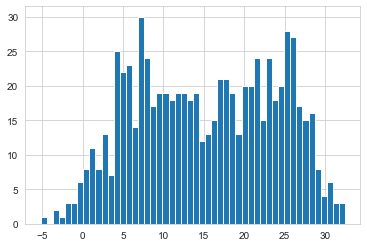

In [14]:
pollution.temp.hist(bins= 50);

In [15]:
pollution.loc[pollution['temp'] <=9, 'tmp_lvl']  = 'cold'

In [16]:
pollution.loc[pollution['temp'] >= 25, 'tmp_lvl']  = 'hot'

In [17]:
pollution.loc[(pollution['temp'] < 25) & ( pollution['temp'] > 9), 'tmp_lvl']  = 'warm'
pollution.tmp_lvl.value_counts()

warm    389
cold    215
hot     127
Name: tmp_lvl, dtype: int64

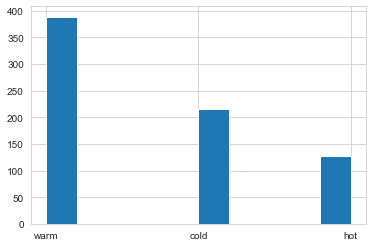

In [19]:
pollution.tmp_lvl.hist();

In [20]:
pollution['weathersit_1'] = pollution['weathersit'].apply(lambda x : "Clear-Cloudy" if x==1 else "Mist-Cloudy" if x == 2 else "Light Rainy-Snowy" if x == 3 else "Heavy Rain-Snowy")   

Polution relation with weather, temperatur, hum and wind

In [114]:
pollution.head()

,Unnamed: 0,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,...,hum,windspeed,casual,registered,cnt,aqi_label,aqi_reading,aqi_label_1,weathersit_1,tmp_lvl
0,1,2,2011-01-01,1,0,1,0,0,0,2,...,0.696087,0.248539,131,670,801,1,46,Good,Mist-Cloudy,warm
1,2,3,2011-01-02,1,0,1,0,1,1,1,...,0.437273,0.248309,120,1229,1349,1,39,Good,Clear-Cloudy,cold
2,12,13,2011-01-03,1,0,1,0,4,1,1,...,0.470417,0.301000,38,1368,1406,1,38,Good,Clear-Cloudy,cold
3,32,33,2011-01-04,1,0,2,0,3,1,2,...,0.775417,0.264308,72,1454,1526,1,50,Good,Mist-Cloudy,cold
4,33,34,2011-01-05,1,0,2,0,4,1,1,...,0.437826,0.277752,61,1489,1550,1,39,Good,Clear-Cloudy,cold


Text(0.5, 0, 'pollution')

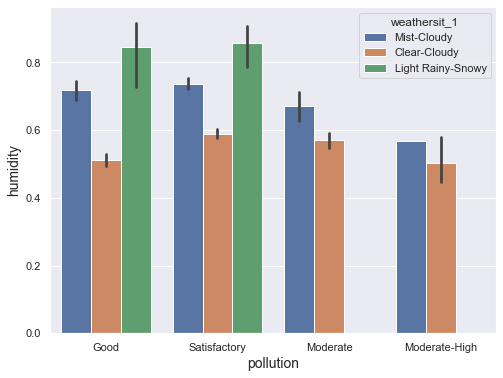

In [115]:
plt.figure(figsize=(8, 6))
sb.barplot(x="aqi_label_1", y="hum", hue = "weathersit_1", data = pollution)
#plt.savefig("fixed Acidity_q_type.png")
plt.ylabel("humidity", size=14)
plt.xlabel("pollution", size=14)

Text(0.5, 0, 'pollution')

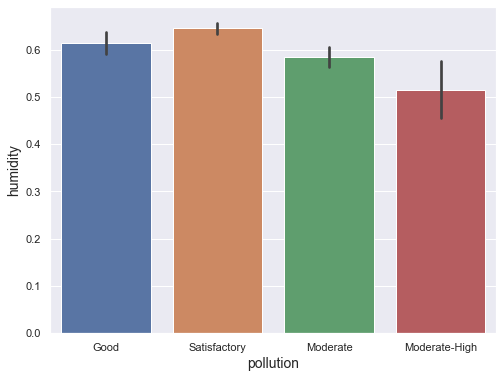

In [116]:
plt.figure(figsize=(8, 6))
sb.barplot(x="aqi_label_1", y="hum", data = pollution)
#plt.savefig("fixed Acidity_q_type.png")
plt.ylabel("humidity", size=14)
plt.xlabel("pollution", size=14)

Text(0.5, 0, 'weather')

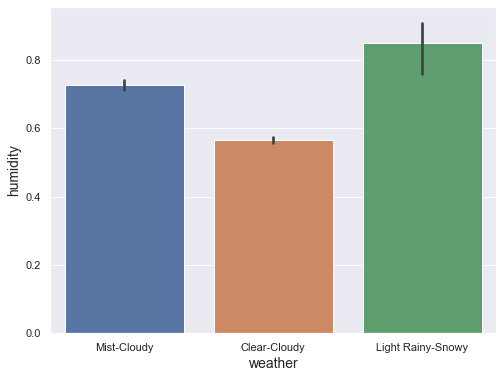

In [117]:
plt.figure(figsize=(8, 6))
sb.barplot(x="weathersit_1", y="hum", data = pollution)
#plt.savefig("fixed Acidity_q_type.png")
plt.ylabel("humidity", size=14)
plt.xlabel("weather", size=14)

Text(0.5, 0, 'weather')

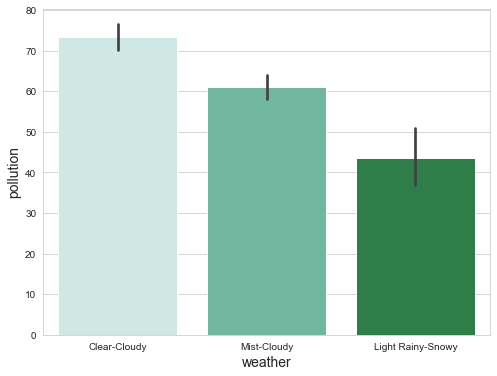

In [84]:
plt.figure(figsize=(8, 6))
sb.barplot(x="weathersit_1", y="aqi_reading", data = pollution, order = ["Clear-Cloudy", "Mist-Cloudy", "Light Rainy-Snowy"], palette= "BuGn")
#plt.savefig("fixed Acidity_q_type.png")
plt.ylabel("pollution", size=14)
plt.xlabel("weather", size=14)

Text(0.5, 0, 'temperature')

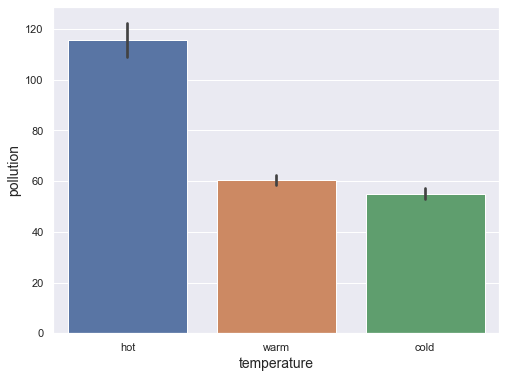

In [119]:
plt.figure(figsize=(8, 6))
sb.barplot(x="tmp_lvl", y="aqi_reading", data = pollution, order = ["hot", "warm", "cold"])
#plt.savefig("fixed Acidity_q_type.png")
plt.ylabel("pollution", size=14)
plt.xlabel("temperature", size=14)

In [120]:
pollution.columns

Index(['Unnamed: 0', 'instant', 'dteday', 'season', 'yr', 'mnth', 'holiday',
       'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum',
       'windspeed', 'casual', 'registered', 'cnt', 'aqi_label', 'aqi_reading',
       'aqi_label_1', 'weathersit_1', 'tmp_lvl'],
      dtype='object')

Text(0.5, 0, 'pollution')

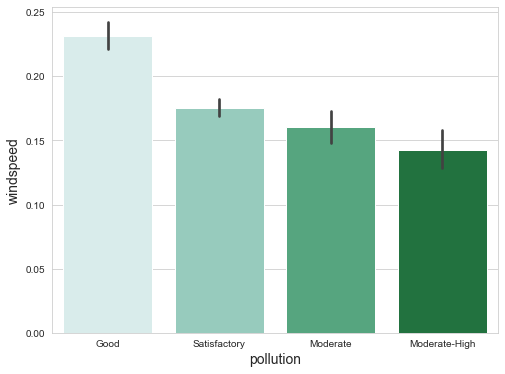

In [87]:
plt.figure(figsize=(8, 6))
sb.barplot(x="aqi_label_1", y="windspeed", data = pollution, palette = "BuGn")
#plt.savefig("fixed Acidity_q_type.png")
plt.ylabel("windspeed", size=14)
plt.xlabel("pollution", size=14)

month- pollution

In [122]:
pollution.columns

Index(['Unnamed: 0', 'instant', 'dteday', 'season', 'yr', 'mnth', 'holiday',
       'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum',
       'windspeed', 'casual', 'registered', 'cnt', 'aqi_label', 'aqi_reading',
       'aqi_label_1', 'weathersit_1', 'tmp_lvl'],
      dtype='object')

Text(0.5, 0, 'pollution')

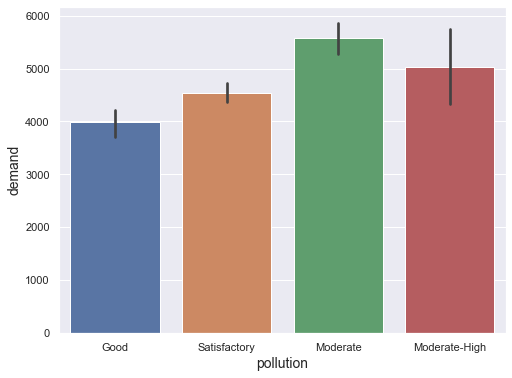

In [123]:
plt.figure(figsize=(8, 6))
sb.barplot(x="aqi_label_1", y="cnt", data=pollution)
#plt.savefig("fixed Acidity_q_type.png")
plt.ylabel("demand", size=14)
plt.xlabel("pollution", size=14)

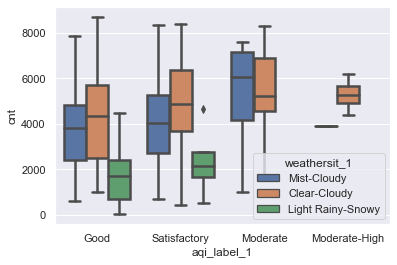

In [124]:
ax = sb.boxplot(x="aqi_label_1", y="cnt", hue="weathersit_1",data=pollution,linewidth=2.5)

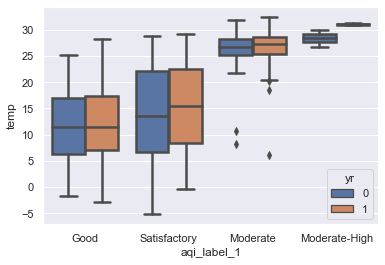

In [127]:
ax = sb.boxplot(x="aqi_label_1", y="temp", hue="yr", data=pollution,linewidth=2.5)

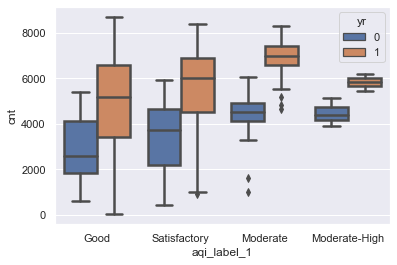

In [128]:
ax = sb.boxplot(x="aqi_label_1", y="cnt", hue="yr",

                 data=pollution,linewidth=2.5)

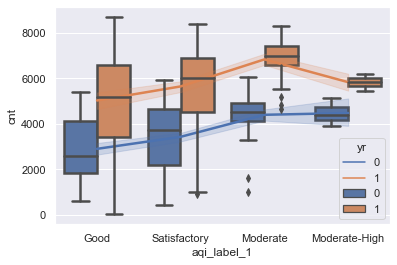

In [129]:
sb.lineplot(x="aqi_label_1", y="cnt", hue="yr", data=pollution,linewidth=2.5)
ax = sb.boxplot(x="aqi_label_1", y="cnt", hue="yr",

                 data=pollution,linewidth=2.5)